# Project 2
**Note - Please add the lena.png and wolves.png file before executing the Code.**

## Question 1 Part a

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from posixpath import pardir
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

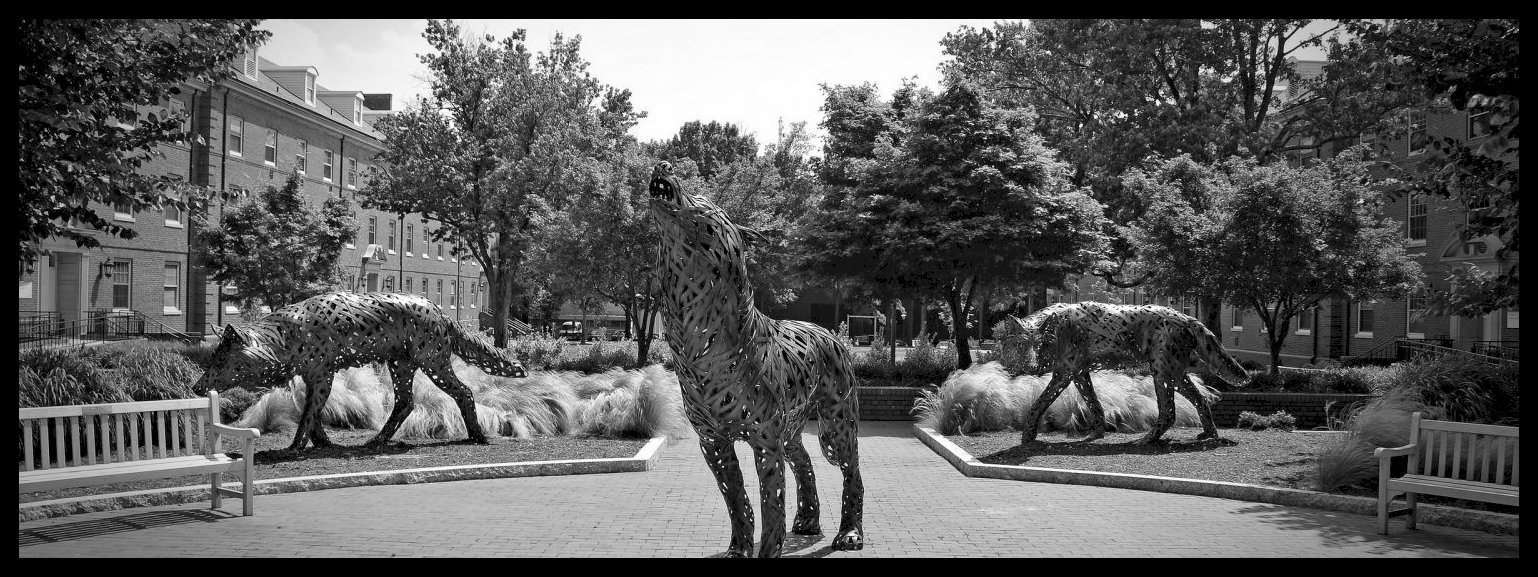

In [257]:
image = cv2.imread('wolves.png',0)
def zero(pad,image):
  rows = image.shape[0]
  cols = image.shape[1] 
  imgpad =np.zeros((image.shape[0] + pad*2, image.shape[1] + pad*2))
  imgpad[int(pad):int(-1 * pad), int(pad):int(-1 * pad)] = image
  return imgpad
cv2_imshow(zero(19,image))

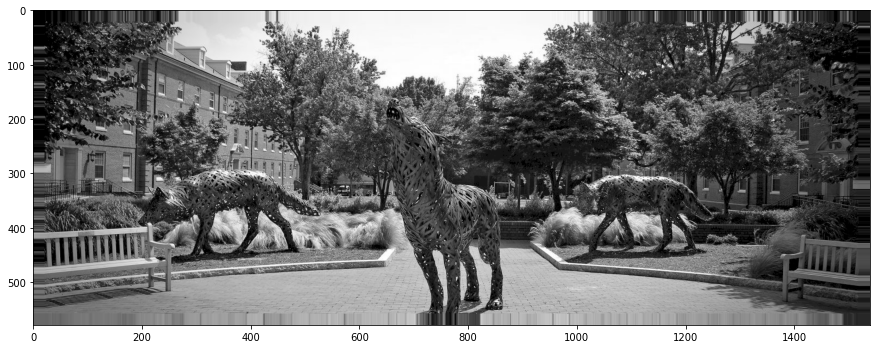

In [258]:
#copy-edge
# image =np.array([[25,100,75,49,130],[50,80,0,70,100],[5,10,20,30,0],[60,50,12,24,32],[60,50,12,24,32],[37,53,55,21,90],[140,17,0,23,222]])

### Logic used 
 # imgpad[:,0]=imgpad[:,2]
  # imgpad[:,1]=imgpad[:,2]
  # imgpad[:,cols+2]=imgpad[:,cols+1]
  # imgpad[:,cols+3]=imgpad[:,cols+1]
  # imgpad[0:2,:]= imgpad[2,:]
  # imgpad[rows+2:rows+4,:]=imgpad[rows+1,:]
def copyedge(pad,image):

  rows = image.shape[0]
  cols = image.shape[1] 
  imgpad =np.zeros((image.shape[0] + pad*2, image.shape[1] + pad*2))
  imgpad[int(pad):int(-1 * pad), int(pad):int(-1 * pad)] = image

  for i in range(pad):
    imgpad[:,i] = imgpad[:,pad]
    imgpad[:,cols+i+pad] =imgpad[:,cols+pad-1]
  imgpad[0:pad,:]= imgpad[pad,:]
  imgpad[rows+pad:rows+2*pad,:]=imgpad[rows+pad-1,:]
  return imgpad
image = cv2.imread('wolves.png',0)
im=np.array(copyedge(20,image),dtype='uint8')
im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(im)


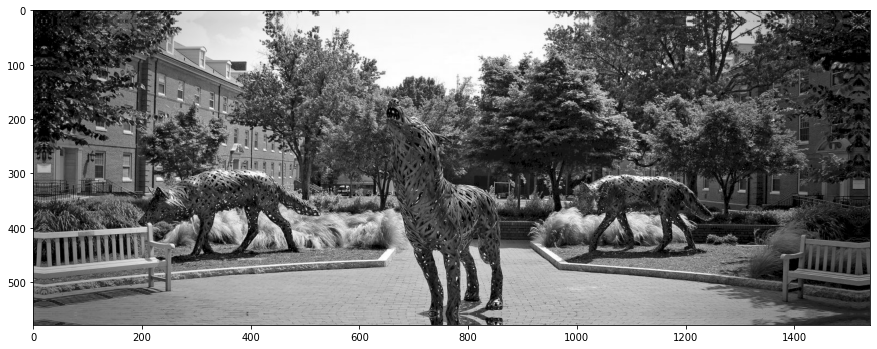

In [ ]:
# Reflective Edge Main Code

# image =np.array([[25,100,75,49,130],[50,80,0,70,100],[5,10,20,30,0],[60,50,12,24,32],[60,50,12,24,32],[37,53,55,21,90],[140,17,0,23,222]])
def reflect(pad,image):

  rows = image.shape[0]
  cols = image.shape[1] 
  imgpad =np.zeros((image.shape[0] + pad*2, image.shape[1] + pad*2))
  imgpad[int(pad):int(-1 * pad), int(pad):int(-1 * pad)] = image

  for i in range(pad):
    imgpad[i,:]=imgpad[2*pad-i,:]
    imgpad[rows+pad+i,:]=imgpad[rows+pad-(2+i),:]
    imgpad[:,i]=imgpad[:,2*pad-i]
    imgpad[:,cols+pad+i]=imgpad[:,cols+pad-(2+i)]

  return imgpad
image = cv2.imread('/content/wolves.png',0)
im=np.array(reflect(20,image),dtype='uint8')
im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(im)
# cv2_imshow(reflect(19,bl))

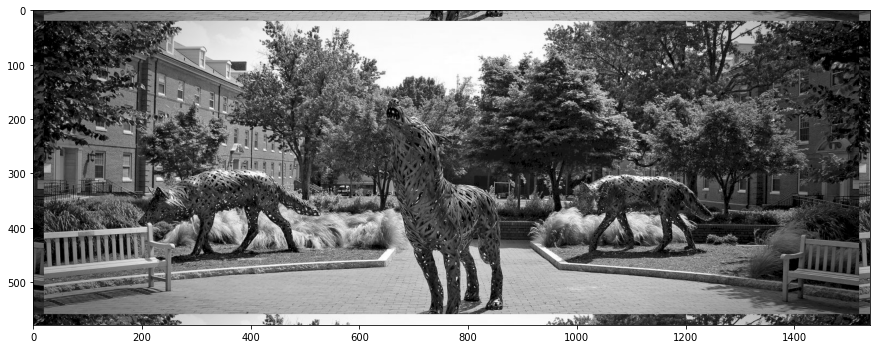

In [ ]:
# Wrap Around
# image =np.array([[25,100,75,49,130],[50,80,0,70,100],[5,10,20,30,0],[60,50,12,24,32],[60,50,12,24,32],[37,53,55,21,90],[140,17,0,23,222]])
def wrap_around(pad,image):

  rows = image.shape[0]
  cols = image.shape[1] 
  imgpad =np.zeros((image.shape[0] + pad*2, image.shape[1] + pad*2))
  imgpad[int(pad):int(-1 * pad), int(pad):int(-1 * pad)] = image

  # print(image)
  # print(imgpad)

  for i in range(pad):
    imgpad[i,:]= imgpad[rows+i,:]
    imgpad[rows+i+pad,:]=imgpad[pad+i,:]
    imgpad[:,i]=imgpad[:,cols+i]
    imgpad[:,cols+i+pad]=imgpad[:,pad+i]
  return imgpad 
image = cv2.imread('/content/wolves.png',0)

im=np.array(wrap_around(20,image),dtype='uint8')
im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(im)


In [ ]:
# 9 Different Kernels
def kernel(x):
  if x == 'box':
    w = 1/9*np.array([[1,1,1],[1,1,1],[1,1,1]])
    return w
  elif x =='dh':
    w = np.array([[-1,1]])
    return w
  elif x =='dv':
    w =np.array([[1],[-1]])
    return w
  elif x =='prewittx':
    w = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    return w
  elif x =='prewitty':
    w = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    w = w.T
    return w
  elif x == 'sobelx':
    w = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    return w
  elif x == 'sobely':
    w = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    return w
  elif x =='robertsx':
    w =np.array([[0,1],[-1,0]])
    return w
  elif x =='robertsy':
    w =np.array([[1,0],[0,-1]])
    return w   
  elif x =='normal':
    w = np.array([[1,1,1],[1,1,1],[1,1,1]])
    return w
kernel('robertsx')

array([[ 0,  1],
       [-1,  0]])

In [ ]:
def select_pad(x,pad,image):
  if x =="copy":
    return copyedge(pad,image)
  elif x =="reflect":
    return reflect(pad,image)
  elif x =="wrap":
    return wrap_around(pad,image)
  else:
    return zero(pad,image)

### Different Kernels

In [262]:
image = cv2.imread('/content/wolves.png',0)
w1 = kernel('box')
w2 = kernel('dh')
w3 = kernel('dv')
w4 = kernel('prewittx')
w5 = kernel('prewitty')
w6 = kernel('sobelx')
w7 = kernel('sobely')
w8 =kernel('robertsx')
w9 = kernel('robertsy')
w10 = kernel('normal')

### Convolution for Gray Image Showing Different Padding


Text(0.5, 1.0, 'Copy-Edge')

<Figure size 720x720 with 0 Axes>

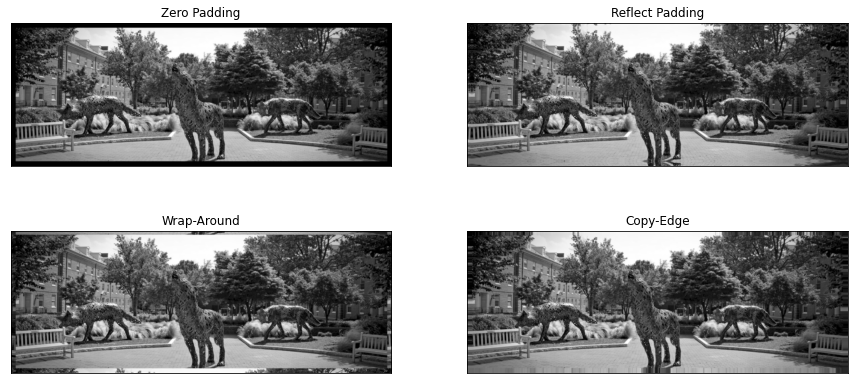

In [ ]:

# Convolution for Gray Image Showing Different Padding

def conv2(f,w,pad_type,pad):
  i = f.shape[0]
  j = f.shape[1]

  w = np.flipud(np.fliplr(w))
  m = w.shape[0]
  n = w.shape[1]
  #Image Padding
  imagePadded = select_pad(pad_type,pad,f)
  # print(imagePadded)
  xOutput = int((i - m + 2 * pad) + 1)
  yOutput = int((j - n + 2 * pad)  + 1)
  y = np.zeros((xOutput,yOutput))
  for a in range(xOutput):
    for b in range(yOutput):
      y[a,b] = (w * imagePadded[a: a + m, b: b + n]).sum()
  # plt.imshow(y)
  return y

image = cv2.imread('/content/wolves.png',0)
w = kernel('normal')
z = conv2(image,w,'copy',20)

plt.figure(figsize=(10,10))
fin_img1 = np.array(conv2(image,w,'zero',20))
# fin_img1 = cv2.cvtColor(fin_img1, cv2.COLOR_BGR2RGB)

fin_img2 = np.array(conv2(image,w,'reflect',20))
# fin_img2 = cv2.cvtColor(fin_img2, cv2.COLOR_BGR2RGB)

fin_img3 = np.array(conv2(image,w,'wrap',20))
# fin_img3 = cv2.cvtColor(fin_img3, cv2.COLOR_BGR2RGB)

fin_img4 = np.array(conv2(image,w,'copy',20))
# fin_img4 = cv2.cvtColor(fin_img4, cv2.COLOR_BGR2RGB)
# print(fin_img)
f, axarr = plt.subplots(2,2,figsize=(15,7))

# axarr.set_xticklabels([1,4,5], fontsize=5)
# plt.figure(figsize=(15,15))
axarr[0,0].imshow(fin_img1,cmap ='gray')
axarr[0,0].set_xticks([]),axarr[0,0].set_yticks([])
axarr[0,0].set_title('Zero Padding')
axarr[0,1].imshow(fin_img2,cmap ='gray')
axarr[0,1].set_xticks([]),axarr[0,1].set_yticks([])
axarr[0,1].set_title('Reflect Padding')
axarr[1,0].imshow(fin_img3,cmap ='gray')
axarr[1,0].set_xticks([]),axarr[1,0].set_yticks([])
axarr[1,0].set_title('Wrap-Around')
axarr[1,1].imshow(fin_img4,cmap ='gray')
axarr[1,1].set_xticks([]),axarr[1,1].set_yticks([])
axarr[1,1].set_title('Copy-Edge')


### Convolution of Gray Image for Different Kernels

Text(0.5, 1.0, 'robertsy')

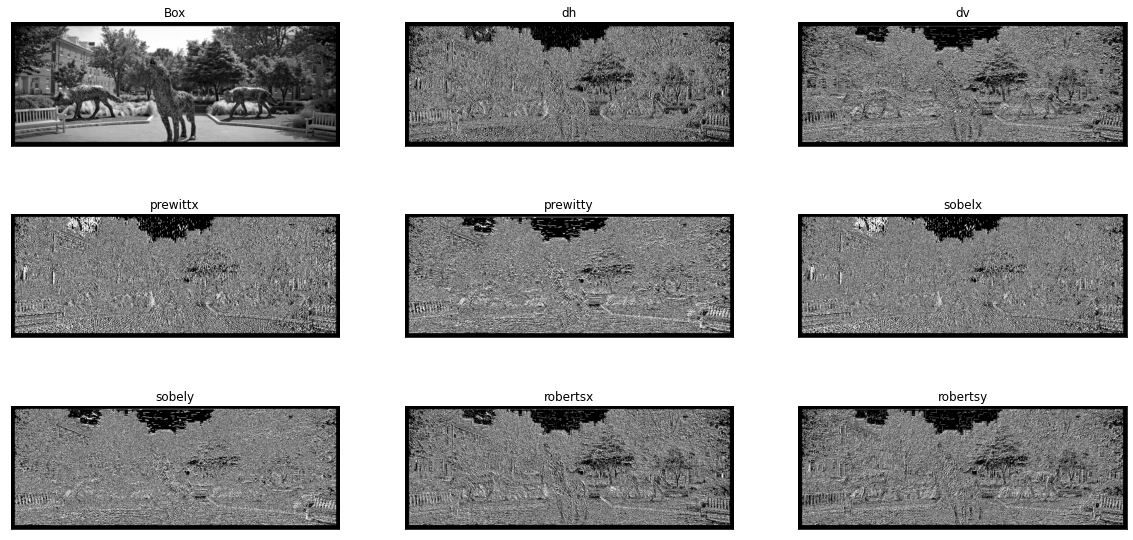

In [261]:


def conv2(f,w,pad_type,pad):
  i = f.shape[0]
  j = f.shape[1]

  w = np.flipud(np.fliplr(w))
  m = w.shape[0]
  n = w.shape[1]
  #Image Padding
  imagePadded = select_pad(pad_type,pad,f)
  # print(imagePadded)
  xOutput = int((i - m + 2 * pad) + 1)
  yOutput = int((j - n + 2 * pad)  + 1)
  y = np.zeros((xOutput,yOutput))
  for a in range(xOutput):
    for b in range(yOutput):
      y[a,b] = (w * imagePadded[a: a + m, b: b + n]).sum()
  # plt.imshow(y)
  return y



fin_img1 = np.array(conv2(image,w1,'zero',20))
# fin_img1 = cv2.cvtColor(fin_img1, cv2.COLOR_BGR2RGB)


fin_img2 = np.array(conv2(image,w2,'zero',20),dtype ='uint8')
# fin_img2 = cv2.cvtColor(fin_img2, cv2.COLOR_BGR2RGB)

fin_img3 = np.array(conv2(image,w3,'zero',20),dtype ='uint8')
# fin_img3 = cv2.cvtColor(fin_img3, cv2.COLOR_BGR2RGB)

fin_img4 = np.array(conv2(image,w4,'zero',20),dtype ='uint8')
# fin_img4 = cv2.cvtColor(fin_img4, cv2.COLOR_BGR2RGB)

fin_img5 = np.array(conv2(image,w5,'zero',20),dtype ='uint8')
# fin_img5 = cv2.cvtColor(fin_img5, cv2.COLOR_BGR2RGB)

fin_img6 = np.array(conv2(image,w6,'zero',20),dtype ='uint8')
# fin_img6 = cv2.cvtColor(fin_img6, cv2.COLOR_BGR2RGB)

fin_img7 = np.array(conv2(image,w7,'zero',20),dtype ='uint8')
# fin_img7 = cv2.cvtColor(fin_img7, cv2.COLOR_BGR2RGB)

fin_img8 = np.array(conv2(image,w8,'zero',20),dtype ='uint8')
# fin_img8 = cv2.cvtColor(fin_img8, cv2.COLOR_BGR2RGB)

fin_img9 = np.array(conv2(image,w9,'zero',20),dtype ='uint8')
# fin_img9 = cv2.cvtColor(fin_img9, cv2.COLOR_BGR2RGB)
# print(fin_img)
f, axarr = plt.subplots(3,3,figsize=(20,10))

axarr[0,0].imshow(fin_img1,cmap ='gray')
axarr[0,0].set_xticks([]),axarr[0,0].set_yticks([])
axarr[0,0].set_title('Box')

axarr[0,1].imshow(fin_img2,cmap ='gray')
axarr[0,1].set_xticks([]),axarr[0,1].set_yticks([])
axarr[0,1].set_title('dh')

axarr[0,2].imshow(fin_img3,cmap ='gray')
axarr[0,2].set_xticks([]),axarr[0,2].set_yticks([])
axarr[0,2].set_title('dv')

axarr[1,0].imshow(fin_img4,cmap ='gray')
axarr[1,0].set_xticks([]),axarr[1,0].set_yticks([])
axarr[1,0].set_title('prewittx')

axarr[1,1].imshow(fin_img5,cmap ='gray')
axarr[1,1].set_xticks([]),axarr[1,1].set_yticks([])
axarr[1,1].set_title('prewitty')

axarr[1,2].imshow(fin_img6,cmap ='gray')
axarr[1,2].set_xticks([]),axarr[1,2].set_yticks([])
axarr[1,2].set_title('sobelx')

axarr[2,0].imshow(fin_img7,cmap ='gray')
axarr[2,0].set_xticks([]),axarr[2,0].set_yticks([])
axarr[2,0].set_title('sobely')

axarr[2,1].imshow(fin_img8,cmap ='gray')
axarr[2,1].set_xticks([]),axarr[2,1].set_yticks([])
axarr[2,1].set_title('robertsx')

axarr[2,2].imshow(fin_img9,cmap ='gray')
axarr[2,2].set_xticks([]),axarr[2,2].set_yticks([])
axarr[2,2].set_title('robertsy')

# plt.imshow(fin_img2)
# plt.title('dh')


### Convolution of BGR Image with different Kernels and Reflect Padding

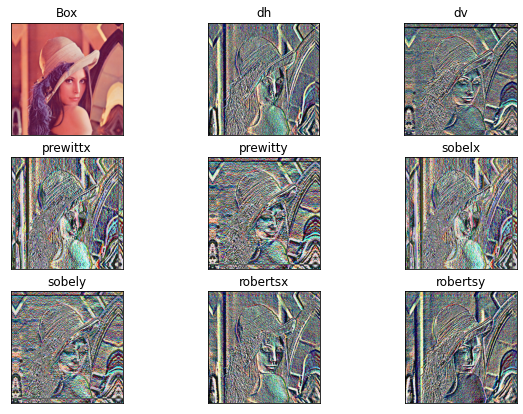

Convolution with dh kernel


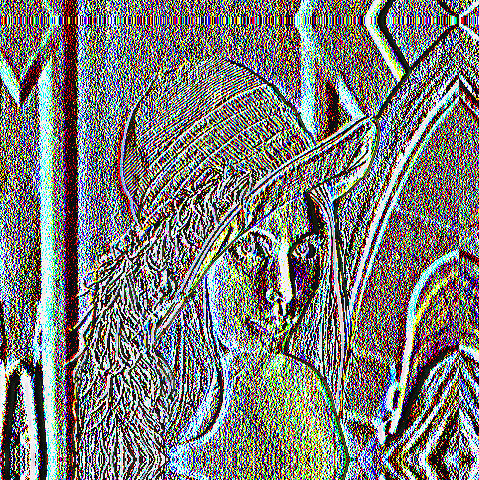

In [260]:
# Convolution Function for BGR Image
image = cv2.imread('/content/lena.png') # Color Image File
# bl,g,r = cv2.split(image)
# print(bl.shape)
# w = kernel('box')
def conv2_bgr(image,w,pad_type,pad):

  bl,g,r = cv2.split(image)
  i = bl.shape[0]
  j = bl.shape[1]
  
  w = np.flipud(np.fliplr(w))
  m = w.shape[0]
  n = w.shape[1]
    #Image Padding
  # print(imagePaddedx.shape)
  imagePaddedx = select_pad(pad_type,pad,bl)
  # print(select_pad('zero',pad, bl))
  imagePaddedy = select_pad(pad_type,pad,g)
  imagePaddedz = select_pad(pad_type,pad,r)

  # print(imagePaddedx.shape)
  xOutput = int((i - m + 2 * pad) + 1)
  yOutput = int((j - n + 2 * pad)  + 1)
  x = np.zeros((xOutput,yOutput))
  y = np.zeros((xOutput,yOutput))
  z = np.zeros((xOutput,yOutput))
  # print(x.shape)
  for a in range(xOutput):
    for b in range(yOutput):
      x[a,b] = (w * imagePaddedx[a: a + m, b: b + n]).sum()
      y[a,b] = (w * imagePaddedy[a: a + m, b: b + n]).sum()
      z[a,b] = (w * imagePaddedz[a: a + m, b: b + n]).sum()
  fin_img = cv2.merge((x,y,z))
  return fin_img
# w = kernel('box')
# fin_img = np.array(conv2_bgr(image,w,'reflect',20),dtype='uint8')
# fin_img = cv2.cvtColor(fin_img,cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(3,3,figsize=(10,7))

# plt.figure(figsize=(10,10))
fin_img1 = np.array(conv2_bgr(image,w1,'reflect',20),dtype ='uint8')
fin_img1 = cv2.cvtColor(fin_img1, cv2.COLOR_BGR2RGB)

fin_img2 = np.array(conv2_bgr(image,w2,'reflect',20),dtype ='uint8')
fin_img2 = cv2.cvtColor(fin_img2, cv2.COLOR_BGR2RGB)

fin_img3 = np.array(conv2_bgr(image,w3,'reflect',20),dtype ='uint8')
fin_img3 = cv2.cvtColor(fin_img3, cv2.COLOR_BGR2RGB)

fin_img4 = np.array(conv2_bgr(image,w4,'reflect',20),dtype ='uint8')
fin_img4 = cv2.cvtColor(fin_img4, cv2.COLOR_BGR2RGB)

fin_img5 = np.array(conv2_bgr(image,w5,'reflect',20),dtype ='uint8')
fin_img5 = cv2.cvtColor(fin_img5, cv2.COLOR_BGR2RGB)

fin_img6 = np.array(conv2_bgr(image,w6,'reflect',20),dtype ='uint8')
fin_img6 = cv2.cvtColor(fin_img6, cv2.COLOR_BGR2RGB)

fin_img7 = np.array(conv2_bgr(image,w7,'reflect',20),dtype ='uint8')
fin_img7 = cv2.cvtColor(fin_img7, cv2.COLOR_BGR2RGB)

fin_img8 = np.array(conv2_bgr(image,w8,'reflect',20),dtype ='uint8')
fin_img8 = cv2.cvtColor(fin_img8, cv2.COLOR_BGR2RGB)

fin_img9 = np.array(conv2_bgr(image,w9,'reflect',20),dtype ='uint8')
fin_img9 = cv2.cvtColor(fin_img9, cv2.COLOR_BGR2RGB)
# print(fin_img)
axarr[0,0].imshow(fin_img1.astype('uint8'))
axarr[0,0].set_xticks([]),axarr[0,0].set_yticks([])
axarr[0,0].set_title('Box')
axarr[0,1].imshow(fin_img2)
axarr[0,1].set_xticks([]),axarr[0,1].set_yticks([])
axarr[0,1].set_title('dh')
axarr[0,2].imshow(fin_img3)
axarr[0,2].set_xticks([]),axarr[0,2].set_yticks([])
axarr[0,2].set_title('dv')
axarr[1,0].imshow(fin_img4)
axarr[1,0].set_xticks([]),axarr[1,0].set_yticks([])
axarr[1,0].set_title('prewittx')

axarr[1,1].imshow(fin_img5)
axarr[1,1].set_xticks([]),axarr[1,1].set_yticks([])
axarr[1,1].set_title('prewitty')

axarr[1,2].imshow(fin_img6)
axarr[1,2].set_xticks([]),axarr[1,2].set_yticks([])
axarr[1,2].set_title('sobelx')

axarr[2,0].imshow(fin_img7)
axarr[2,0].set_xticks([]),axarr[2,0].set_yticks([])
axarr[2,0].set_title('sobely')

axarr[2,1].imshow(fin_img8)
axarr[2,1].set_xticks([]),axarr[2,1].set_yticks([])
axarr[2,1].set_title('robertsx')

axarr[2,2].imshow(fin_img9)
axarr[2,2].set_xticks([]),axarr[2,2].set_yticks([])
axarr[2,2].set_title('robertsy')

plt.show()
print("Convolution with dh kernel")
cv2_imshow(fin_img2)


## Question 1 Part B

Images are saved as before_convolution and after_convolution

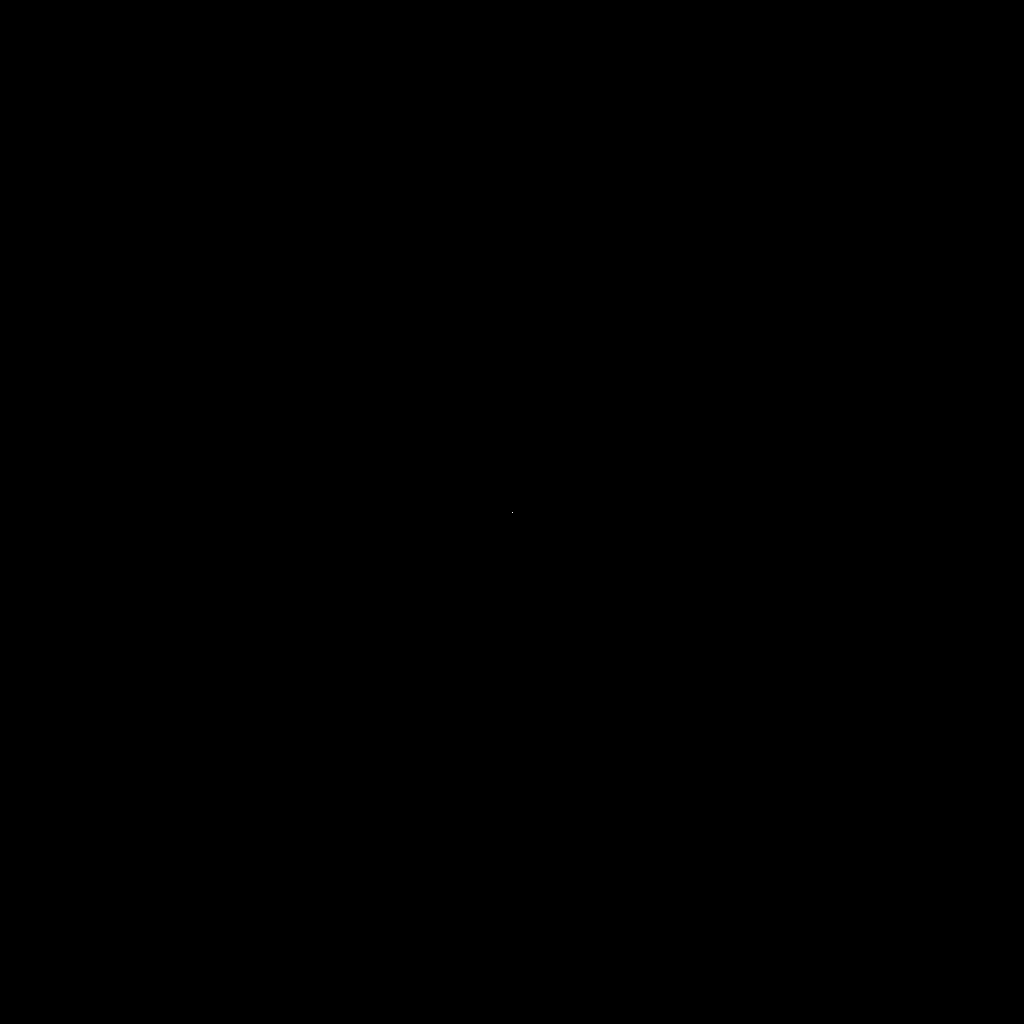

Before Convolution
 [[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0. 255.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
After Convolution
 [[   0.    0.    0.    0.    0.]
 [   0.  255.  255.  255.    0.]
 [   0.    0.    0.    0.    0.]
 [   0. -255. -255. -255.    0.]
 [   0.    0.    0.    0.    0.]]


True

In [ ]:
#Question 1 Part B
w = kernel('prewitty')
# pad = 20
new_array = np.zeros([1024,1024])
new_array[512,512] = 255 
img  = np.array(new_array)
cv2_imshow(img)
print(f'Before Convolution\n {img[510:515,510:515]}')
cv2.imwrite("/content/before_convolution.png", img)
y = np.array(conv2(img,w,'zero',1))
print(f'After Convolution\n {y[510:515,510:515]}')
cv2.imwrite("/content/after_convolution.png", y)
# f, axarr = plt.subplots(3,3,figsize=(10,7))
cv2_imshow(y)


# Question 2

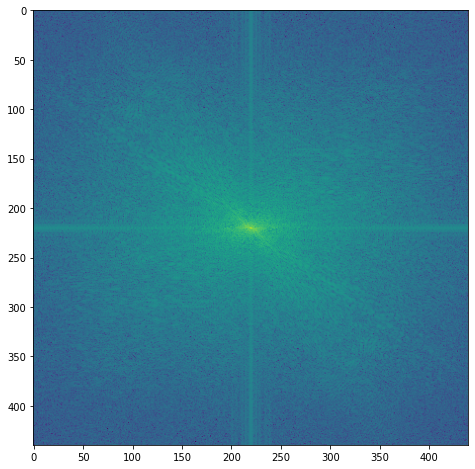

In [ ]:
#Question 2 FINAL
def DFT2(img):
  gray = np.array(img)
  x,y = gray.shape
  min_gray = np.min(gray)
  # max_gray = np.max(gray)
  d = np.max(gray) - np.min(gray)
  new_gray = np.zeros((x,y))

  for i in range(x):
    for j in range(y):
      new_gray[i,j] = ((gray[i,j])-min_gray)/d # scaling to[0,1]
    
  fftx = np.fft.fft(img,axis=0) #Calculating FFT along the Rows
  fftxy = np.fft.fft(fftx,axis=1) #Calculating FFT along the Columns
  return fftxy
img = cv2.imread('lena.png',0)
shift = np.fft.fftshift(DFT2(img))
ms_l = np.log(1+np.abs(shift))
plt.figure(figsize=(8,8))
plt.imshow(ms_l)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


[[169 168 167 ... 178 167 141]
 [169 168 167 ... 178 167 141]
 [169 168 167 ... 176 165 140]
 ...
 [ 53  56  61 ... 116 112 111]
 [ 53  56  61 ... 115 117 119]
 [ 53  56  61 ... 115 118 122]]


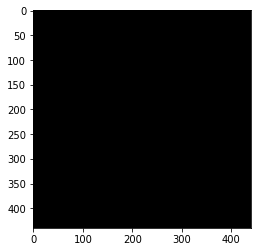

In [ ]:
# Final IDFT function
def getint_img(f,img): #converting to uint8 form
    v = abs(f) * img.max()
    v = np.round(v).astype(np.uint8)
    return v

def IDFT2(fft2):
  fftconj = np.conj(fft2)
  fftxy = DFT2(fftconj)
  fftxy = fftxy /(fft2.shape[0]*fft2.shape[1])
  fftxy = (fftxy / np.max(fftxy)-np.min(fftxy))+np.min(fftxy) # scaling back to get the original image
  fftxy = np.conj(fftxy)
  return fftxy
idft_img = getint_img(IDFT2(DFT2(img)),img)
print(idft_img)
plt.imshow(idft_img-img,cmap ='gray')





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


[[169 168 167 ... 178 167 141]
 [169 168 167 ... 178 167 141]
 [169 168 167 ... 176 165 140]
 ...
 [ 53  56  61 ... 116 112 111]
 [ 53  56  61 ... 115 117 119]
 [ 53  56  61 ... 115 118 122]]


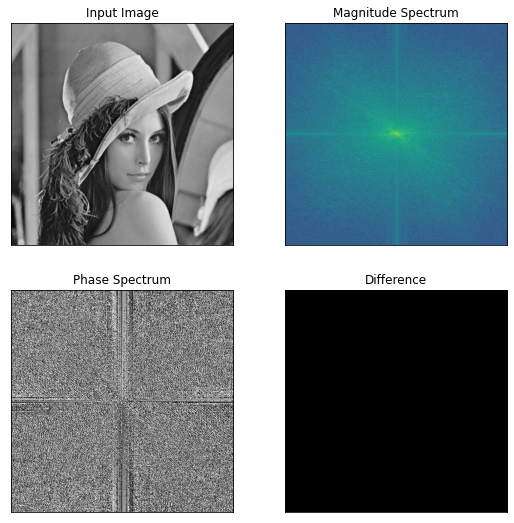

In [ ]:
# Plotting 
img = cv2.imread('lena.png',0) #Reading the Black and White Image.
shift = np.fft.fftshift(DFT2(img)) # Shifting the 0's to the Center
ms_l = np.log(1+np.abs(shift))
ps_l = np.angle(shift)
# plt.imshow(ms_l)

idft_img = getint_img(IDFT2(DFT2(img)),img)
print(idft_img)
diff = idft_img - img
# plt.imshow(idft_img-img,cmap ='gray')


plt.figure(figsize=(9,9))

plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Input Image')

plt.subplot(222)
plt.imshow(ms_l)
plt.xticks([]), plt.yticks([])
plt.title('Magnitude Spectrum')

plt.subplot(223)
plt.imshow(ps_l, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Phase Spectrum')

plt.subplot(224)
plt.imshow(diff, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Difference')
plt.show()